In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,250.000000,250.00000,250.000000,250.000000
mean,125.500000,38.49200,95.592000,50.244000
std,72.312977,13.17026,77.308758,27.289914
min,1.000000,18.00000,15.000000,1.000000
25%,63.250000,29.00000,47.000000,27.000000
50%,125.500000,36.00000,70.000000,50.000000
75%,187.750000,47.75000,101.000000,74.000000
max,250.000000,70.00000,325.000000,99.000000


In [5]:
dummies = pd.get_dummies(df.Gender)
dummies.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [6]:
df = pd.concat([df,dummies],axis='columns')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,0


In [7]:
df.drop(['Gender','CustomerID','Male'],axis = 'columns' ,inplace = True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Female
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


In [8]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)

y_prediction = km.fit_predict(df)
y_prediction

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
df['cluster'] = y_prediction
df

,Age,Annual Income (k$),Spending Score (1-100),Female,cluster
0,19,15,39,0,2
1,21,15,81,0,2
2,20,16,6,1,2
3,23,16,77,1,2
4,31,17,40,1,2
...,...,...,...,...,...
245,30,297,69,0,1
246,56,311,14,1,1
247,29,313,90,0,1
248,19,316,32,1,1


In [10]:
km.cluster_centers_

array([[ 36.62121212,  97.06060606,  59.92424242,   0.51515152],
       [ 36.69767442, 249.02325581,  51.20930233,   0.53488372],
       [ 39.91489362,  48.11347518,  45.41843972,   0.56737589]])

In [11]:
%%markdown
## Elbow

## Elbow


In [12]:
k_range = range(1,15,1)
sse = [] 
for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit_predict(df)
    sse.append(model.inertia_)

Text(0, 0.5, 'EES')

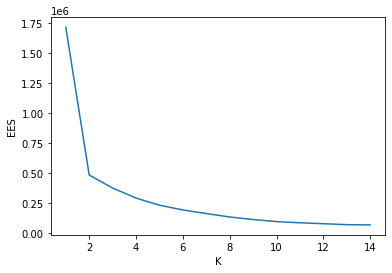

In [13]:
import matplotlib.pyplot as plt

plt.plot(k_range,sse)
plt.xlabel('K')
plt.ylabel('EES')